---
# 실습해보기

### kaggle에서 원하는 csv데이터 세트를 다운받고 데이터세트형태에 따라 회귀, 분류, 군집화중 하나의 모델을 선택하여 활용해보기


2017~2018년 각 나라마다의 유튜브 영상 중 한국 영상에 대해 정리된 파일을 가져왔습니다.
칼럼은 썸네일 이미지를 제외한 채널명, 영상개시 시간, 조회수, 좋아요, 싫어요, 댓글수, 태그, 영상 설명 으로 8개의 칼럼을 가져와서 분석을 실시했습니다.
특별히 이 영상 설명의 글을 따로 모아 문장 분석을 해보았습니다.

https://www.kaggle.com/datasets/datasnaek/youtube

In [228]:
clear()

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df_v = pd.read_csv('data/KRvideos.csv', encoding_errors = 'ignore') #불러올때 CP949든 utf-8이든 둘 다 안 될 경우

df_v = df_v[(df_v['comments_disabled'] == False) & (df_v['ratings_disabled'] == False) & (df_v['video_error_or_removed'] == False)]
# df_v = df_v.set_index('channel_title')
df_v = df_v[['channel_title', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count', 'tags',  'description']]
# df_v = df_v.sort_values('views', ascending = False)
df_v['publish_time'] = pd.to_datetime(df_v['publish_time'], format='ISO8601')
df_v['publish_time'] = df_v['publish_time'].dt.strftime('%Y/%m/%d %H:%M:%S')
df_v = df_v[df_v['views'] >= 100000]
df_v = df_v.dropna()
df_v = df_v.reset_index()
df_v = df_v.drop('index', axis=1)
df_v


,channel_title,publish_time,views,likes,dislikes,comment_count,tags,description
0,라푸마코리아,2017/11/13 07:07:36,156130,1422,40,272,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,나몰라패밀리 핫쇼,2017/11/11 07:16:08,421409,5112,166,459,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",퍼가실때 꼭 출처 부탁드려요
2,미디어몽구,2017/11/12 11:19:52,222850,2093,173,1219,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",다스는 누구겁니까 듣고 난 후 표정
3,하우스,2017/11/12 10:17:48,188707,545,311,357,"김정숙|""김정숙 여사""|""김정숙 문재인""|""문재인 대통령""|""문재인""|""문재인 인도...",김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 ...
4,채린이의 즐거운 유튜브,2017/11/12 03:30:47,114858,252,40,36,"Positive|""Energy""|""Chakra""|""Balancing""|""Healin...",매일 2개 영상 업로드 됩니다 ^^\n즐겁게 보셨다면 구독과 좋아요를 눌러주세요 ^^
...,...,...,...,...,...,...,...,...
16527,Jaeguchi,2018/06/10 16:32:19,2251851,159331,648,13263,"BTS|""BTS DDAENG""|""DDAENG""|""BTS DDAENG COLOR CO...",All Rights Administered by Bighit Entertainmen...
16528,Yuka Kinoshita木下ゆうか,2018/06/12 09:00:11,736406,12361,1527,1637,"foodchallenge|""SocialEating""|""Social Eating""|""...",電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttps://amzn.to/2kI...
16529,Kakao Coffee,2018/06/11 07:00:03,159204,433,58,183,"반전|""역관광""|""김치녀""",울산의 한 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다.
16530,이슈트래커,2018/06/10 23:00:01,156439,383,58,308,[none],- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...


In [230]:
# df_v = df_v[['comments_disabled', 'ratings_disabled', 'video_error_or_removed']]

# df_v

In [231]:
# c = df_v['comments_disabled'] | df_v['ratings_disabled'] | df_v['video_error_or_removed']
# df_v[~c]

In [232]:
# result = df_v[df_v['channel_title'].str.contains('예수')]
# result = result.sort_values('views', ascending = False)
# result

In [233]:
# df_v = df_v.set_index('channel_title')   # 이건 인덱스로 지정했을 때 사용 가능
# text = df_v.loc['YouTube Spotlight' ,'tags']
# text
# text = df_v.loc[ 1,'description'].strip()
# text

## 1. 텍스트 클렌징

텍스트 분석이전에 분석에 방해가 되는 요소를 제거하여 분석에 필요한 텍스트만 남기는 작업 입니다.   
특수문자를 제거하는 작업과 분석에 방해가 되는 특정 문자를 제거하는 불용어 제거 등이 포함됩니다.

### 1.1 특수문자 제거하기
특수 문자 제거는 파이썬의 내장 모듈인 `re` 모듈을 import하여 `sub()` 함수를 이용해 줍니다.
> re.sub(수정될 문자열의 정규식, 수정후의 문자열, 문자열)

In [234]:
description = df_v.loc[0,'description']
description

"윤종신 '좋니'의 답가 '좋아' 최초 공개!\\n그 여자의 이야기를 지금 만나보세요. \\n\\n좋아, 딱 잊기 좋은 추억 정도야\\n난 딱 알맞게 너를 사랑했어.\\n\\n'좋니'의 그에게 보내는 그 여자의 답가\\n애절한 이별 후에도, 설레는 사랑의 시작에도\\n라푸마가 함께합니다."

In [235]:
## 특수문자 정규식을 첫번째 인자로 입력
## 공백을 두번째 인자로 입력
import re
rtext = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\xa0\n\d+▲▼▶◀△▷▽◁✔❣♥\n\\n]', '', description)
rtext

'윤종신 좋니의 답가 좋아 최초 공개\\n그 여자의 이야기를 지금 만나보세요 \\n\\n좋아 딱 잊기 좋은 추억 정도야\\n난 딱 알맞게 너를 사랑했어\\n\\n좋니의 그에게 보내는 그 여자의 답가\\n애절한 이별 후에도 설레는 사랑의 시작에도\\n라푸마가 함께합니다'

In [236]:
## 먼저 단어를 띄어쓰기 기준으로 스플릿
sptext = rtext.split(' ')
sptext

['윤종신',
 '좋니의',
 '답가',
 '좋아',
 '최초',
 '공개\\n그',
 '여자의',
 '이야기를',
 '지금',
 '만나보세요',
 '\\n\\n좋아',
 '딱',
 '잊기',
 '좋은',
 '추억',
 '정도야\\n난',
 '딱',
 '알맞게',
 '너를',
 '사랑했어\\n\\n좋니의',
 '그에게',
 '보내는',
 '그',
 '여자의',
 '답가\\n애절한',
 '이별',
 '후에도',
 '설레는',
 '사랑의',
 '시작에도\\n라푸마가',
 '함께합니다']

### 1.2 불용어 제거하기
불용어 제거는 파이썬의 문자열 함수와 리스트, 반복문등을 이용하여 구성 가능합니다.    
문자열의 `split()`,`replace()`,`join()`등의 함수를 활용해줍니다.
#### 전체 데이터에 적용하기

In [237]:
nw = []
for w in sptext:
    if w not in ['','초','이','등']:
        nw.append(w)
rtext = ' '.join(nw)
rtext

'윤종신 좋니의 답가 좋아 최초 공개\\n그 여자의 이야기를 지금 만나보세요 \\n\\n좋아 딱 잊기 좋은 추억 정도야\\n난 딱 알맞게 너를 사랑했어\\n\\n좋니의 그에게 보내는 그 여자의 답가\\n애절한 이별 후에도 설레는 사랑의 시작에도\\n라푸마가 함께합니다'

In [238]:
import re

text_sub = []
for text in df_v['description']:
    rtext = str(text).strip()
    rtext = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\xa0\n\d+▲▼▶◀△▷♥▽◁✔❣\\\n]', '', rtext)
    sptext = rtext.split(' ')
    nw = [w for w in sptext if w not in ['','초','이','등']]
    nw = [w for w in sptext if len(w) > 1]

    rtext = ' '.join(nw)
    text_sub.append(rtext)
df_v['description_sub'] = text_sub
df_v

,channel_title,publish_time,views,likes,dislikes,comment_count,tags,description,description_sub
0,라푸마코리아,2017/11/13 07:07:36,156130,1422,40,272,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,윤종신 좋니의 답가 좋아 최초 공개\n그 여자의 이야기를 지금 만나보세요 \n\n좋...
1,나몰라패밀리 핫쇼,2017/11/11 07:16:08,421409,5112,166,459,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",퍼가실때 꼭 출처 부탁드려요,퍼가실때 출처 부탁드려요
2,미디어몽구,2017/11/12 11:19:52,222850,2093,173,1219,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",다스는 누구겁니까 듣고 난 후 표정,다스는 누구겁니까 듣고 표정
3,하우스,2017/11/12 10:17:48,188707,545,311,357,"김정숙|""김정숙 여사""|""김정숙 문재인""|""문재인 대통령""|""문재인""|""문재인 인도...",김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 ...,김정숙 여사는 갑자기 문재인 대통령 주머니에 손을 넣었나 인도네시아 대통령도 깜놀\...
4,채린이의 즐거운 유튜브,2017/11/12 03:30:47,114858,252,40,36,"Positive|""Energy""|""Chakra""|""Balancing""|""Healin...",매일 2개 영상 업로드 됩니다 ^^\n즐겁게 보셨다면 구독과 좋아요를 눌러주세요 ^^,매일 영상 업로드 됩니다 \n즐겁게 보셨다면 구독과 좋아요를 눌러주세요
...,...,...,...,...,...,...,...,...,...
16527,Jaeguchi,2018/06/10 16:32:19,2251851,159331,648,13263,"BTS|""BTS DDAENG""|""DDAENG""|""BTS DDAENG COLOR CO...",All Rights Administered by Bighit Entertainmen...,All Rights Administered by Bighit Entertainmen...
16528,Yuka Kinoshita木下ゆうか,2018/06/12 09:00:11,736406,12361,1527,1637,"foodchallenge|""SocialEating""|""Social Eating""|""...",電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttps://amzn.to/2kI...,電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttpsamzntokIYCTpyo...
16529,Kakao Coffee,2018/06/11 07:00:03,159204,433,58,183,"반전|""역관광""|""김치녀""",울산의 한 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다.,울산의 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다
16530,이슈트래커,2018/06/10 23:00:01,156439,383,58,308,[none],- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...,남편을 돈줄로만 아내 좋아요와 구독은 언제나 환영입니다 카톡시리즈 모든 인물과 장소...


## 2. 토큰화

텍스트를 분석하기 위해서는 텍스트의 특정 단위가 필요하고 이런 단위을 토큰이라고 합니다.   
기본적으로 **토큰화**라고 하면 특정 문자들을 토큰으로 하여 자르는 과정이 됩니다.   

### 2.1 문자로 토큰화

문자로 토큰화 하는 방법중 가장 기본적인 방법은 `split()` 함수를 이용하는 겁니다.   
기본적으로 띄어쓰기 기준으로 스플릿하여 토큰화를 이룰 수 있습니다.

In [239]:
text = df_v.loc[0,'description_sub']
text

'윤종신 좋니의 답가 좋아 최초 공개\\n그 여자의 이야기를 지금 만나보세요 \\n\\n좋아 잊기 좋은 추억 정도야\\n난 알맞게 너를 사랑했어\\n\\n좋니의 그에게 보내는 여자의 답가\\n애절한 이별 후에도 설레는 사랑의 시작에도\\n라푸마가 함께합니다'

In [240]:
sptext = rtext.split(' ')
sptext

['안녕하세요',
 '이슈텔러',
 '입니다화',
 '오후',
 '토요일',
 '오전',
 '재밌고',
 '유익한',
 '영상이',
 '업로드',
 '됩니다',
 '구독',
 '좋아요',
 '부탁드려욧',
 '그리고',
 '항상',
 '행복하세요이슈텔러',
 '두번째',
 '채널',
 '핵꿀잼',
 '영화리뷰httpswwwyoutubecomchannelUCMPaOvmqEVDdhrIFTg이슈텔러',
 'issueTeller',
 '후원하기',
 'Twip',
 'Twitch',
 'httptwipkrdonateianhappy',
 '팬아트',
 '보내는',
 'Email',
 'ianhappygmailcom',
 '인스타',
 '팔로우',
 '고고',
 'httpswwwinstagramcomissueteller']

### 2.2 숫자 인코딩

문자 토큰을 숫치형으로 나타내는 가장 기본적인 방법은 문자 토큰에 **고유숫자**를 부여 하는 방법입니다.   
이렇게 숫자 토큰으로 변환하는 과정을 **인코딩**, 역으로 변환하는 과정을 디코딩이라 합니다.   
기본적인 인코딩 방식은 모든 문자 토큰을 찾아 고유 번호를 맵핑시킨 **딕셔너리**를 만드는 방식입니다.

In [241]:
## 고유 토큰을 찾기위해 set 구조 활용
uq = set()
for text in df_v['description_sub']:
    sp = text.split(' ')
    for w in sp:
        uq.add(w)
uq

{'',
 'Upreti',
 '안타깝습니다',
 '싱글인',
 'Arrangement',
 '알아보쟈',
 'httpsgooglTBoFTroom',
 '회가',
 '양띵TV후추',
 'Silence\\n',
 '\\n“장제원',
 '예의주시',
 '계속됐다며',
 '분영상출처를',
 'Cowboy',
 'Jessica',
 '이분들이',
 'preside',
 '시민들과도',
 '숙련된',
 '움막',
 'again',
 'httpswwwallkpopcomarticlejonghyunsexgirlfriendshinsekyungfellowshineememberkeyvisithimindeepsorrow\\nMusic\\nI',
 '전국구',
 '병속의배',
 'Ордынского',
 '갑사합니다',
 '음식으로',
 '법정',
 '기다려주신',
 '합니까',
 '부르기에',
 '퇴진으로',
 '나무의',
 '없다면서',
 '\\n굴림방식',
 '곡으로',
 '기적',
 '배우분들의',
 '명도',
 '뮤비를',
 '충남지사에게',
 '일가',
 'Ranveer',
 'Available',
 '쾌락을\\n살아남고',
 '충북',
 '기회인만큼',
 'fog\\nghost',
 '\\nhttpmgfmarketnavercomstickerd',
 '영상인듯',
 'попробовать',
 '있겠지만',
 '내놓을',
 '매크로',
 '높이뛰기를',
 'Act',
 '민낯\\n\\n서울',
 'SHOWING',
 '가차없이',
 '개회식을',
 'Flower’를',
 'httpswwwfacebookcomkyunghyangview\\n\\n경향신문',
 '늦었을뿐ㅎㅎ\\n병원까지',
 'happy\\nbut',
 '특색',
 'PEOPLE\\n\\nHelp',
 'httpwwwygeshopcom\\n\\nMore',
 'kizutsuku',
 '이루어',
 '카리스마',
 '때문에\\n소시지가',
 '주주총회가',
 '파티김연자의',
 '매실',
 '”The',
 '룩은

In [242]:
## 고유 토큰에 고유 번호를 맵핑시킨 딕셔너리 구성
enc_dict = {}
for i,t in enumerate(uq):
    enc_dict[t] = i
enc_dict

{'': 0,
 'Upreti': 1,
 '안타깝습니다': 2,
 '싱글인': 3,
 'Arrangement': 4,
 '알아보쟈': 5,
 'httpsgooglTBoFTroom': 6,
 '회가': 7,
 '양띵TV후추': 8,
 'Silence\\n': 9,
 '\\n“장제원': 10,
 '예의주시': 11,
 '계속됐다며': 12,
 '분영상출처를': 13,
 'Cowboy': 14,
 'Jessica': 15,
 '이분들이': 16,
 'preside': 17,
 '시민들과도': 18,
 '숙련된': 19,
 '움막': 20,
 'again': 21,
 'httpswwwallkpopcomarticlejonghyunsexgirlfriendshinsekyungfellowshineememberkeyvisithimindeepsorrow\\nMusic\\nI': 22,
 '전국구': 23,
 '병속의배': 24,
 'Ордынского': 25,
 '갑사합니다': 26,
 '음식으로': 27,
 '법정': 28,
 '기다려주신': 29,
 '합니까': 30,
 '부르기에': 31,
 '퇴진으로': 32,
 '나무의': 33,
 '없다면서': 34,
 '\\n굴림방식': 35,
 '곡으로': 36,
 '기적': 37,
 '배우분들의': 38,
 '명도': 39,
 '뮤비를': 40,
 '충남지사에게': 41,
 '일가': 42,
 'Ranveer': 43,
 'Available': 44,
 '쾌락을\\n살아남고': 45,
 '충북': 46,
 '기회인만큼': 47,
 'fog\\nghost': 48,
 '\\nhttpmgfmarketnavercomstickerd': 49,
 '영상인듯': 50,
 'попробовать': 51,
 '있겠지만': 52,
 '내놓을': 53,
 '매크로': 54,
 '높이뛰기를': 55,
 'Act': 56,
 '민낯\\n\\n서울': 57,
 'SHOWING': 58,
 '가차없이': 59,
 '개회식을': 60,
 'Flower

In [243]:
## 딕셔너리를 활용하여 인코딩
text = df_v.loc[0,'description_sub']
str_tk = text.split(' ')
enc_tk = [enc_dict[w] for w in str_tk]
enc_tk

[87767,
 5555,
 37041,
 26719,
 56897,
 9212,
 48996,
 97809,
 64359,
 30400,
 62579,
 55740,
 2225,
 26826,
 81390,
 22625,
 16400,
 92616,
 23652,
 13909,
 48996,
 81146,
 12893,
 11117,
 33822,
 37530,
 36735,
 79987]

## 3. 형태소 분석기

문자를 토큰화 하기 위해 클렌징 작업을 진행하다보면 너무 많은 불용어를 제거해야 할 경우가 생깁니다. 또한 문자 토큰 자체가 애매한 경우도 생깁니다.     
특히 형용사, 부사와 같이 단어 분석에 큰 의미가 없는 형태소의 처리가 쉽지 않습니다.   
이때, 형태소 분석기 모듈을 활용한다면 클렌징 작업을 보다 쉽게 할 수 있으며, 토큰화 또한 단순 띄어쓰기가 아닌 특정 형태소를 기반으로 토큰화가 가능합니다.

대표적인 형태소 분석기는 다음과 같습니다
1. mecab
2. Okt
3. Kkma
4. Hannanum
5. Komoran
6. kiwipiepy

예시로는 가장 많이 사용되는 `mecab`과 이를 기반한 `kiwipiepy` 두 모듈만 보도록 하겠습니다.   
[mecab](https://python-mecab-ko.readthedocs.io/en/latest/)    
[kiwipiepy](https://bab2min.github.io/kiwipiepy/v0.16.2/kr/)   

In [244]:
import pandas as pd
from mecab import MeCab
from kiwipiepy import Kiwi
import re

df = df_v
mecab = MeCab()
kw = Kiwi()
df

,channel_title,publish_time,views,likes,dislikes,comment_count,tags,description,description_sub
0,라푸마코리아,2017/11/13 07:07:36,156130,1422,40,272,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,윤종신 좋니의 답가 좋아 최초 공개\n그 여자의 이야기를 지금 만나보세요 \n\n좋...
1,나몰라패밀리 핫쇼,2017/11/11 07:16:08,421409,5112,166,459,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",퍼가실때 꼭 출처 부탁드려요,퍼가실때 출처 부탁드려요
2,미디어몽구,2017/11/12 11:19:52,222850,2093,173,1219,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",다스는 누구겁니까 듣고 난 후 표정,다스는 누구겁니까 듣고 표정
3,하우스,2017/11/12 10:17:48,188707,545,311,357,"김정숙|""김정숙 여사""|""김정숙 문재인""|""문재인 대통령""|""문재인""|""문재인 인도...",김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 ...,김정숙 여사는 갑자기 문재인 대통령 주머니에 손을 넣었나 인도네시아 대통령도 깜놀\...
4,채린이의 즐거운 유튜브,2017/11/12 03:30:47,114858,252,40,36,"Positive|""Energy""|""Chakra""|""Balancing""|""Healin...",매일 2개 영상 업로드 됩니다 ^^\n즐겁게 보셨다면 구독과 좋아요를 눌러주세요 ^^,매일 영상 업로드 됩니다 \n즐겁게 보셨다면 구독과 좋아요를 눌러주세요
...,...,...,...,...,...,...,...,...,...
16527,Jaeguchi,2018/06/10 16:32:19,2251851,159331,648,13263,"BTS|""BTS DDAENG""|""DDAENG""|""BTS DDAENG COLOR CO...",All Rights Administered by Bighit Entertainmen...,All Rights Administered by Bighit Entertainmen...
16528,Yuka Kinoshita木下ゆうか,2018/06/12 09:00:11,736406,12361,1527,1637,"foodchallenge|""SocialEating""|""Social Eating""|""...",電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttps://amzn.to/2kI...,電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttpsamzntokIYCTpyo...
16529,Kakao Coffee,2018/06/11 07:00:03,159204,433,58,183,"반전|""역관광""|""김치녀""",울산의 한 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다.,울산의 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다
16530,이슈트래커,2018/06/10 23:00:01,156439,383,58,308,[none],- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...,남편을 돈줄로만 아내 좋아요와 구독은 언제나 환영입니다 카톡시리즈 모든 인물과 장소...


In [245]:
text = df.loc[0,'description']
text

"윤종신 '좋니'의 답가 '좋아' 최초 공개!\\n그 여자의 이야기를 지금 만나보세요. \\n\\n좋아, 딱 잊기 좋은 추억 정도야\\n난 딱 알맞게 너를 사랑했어.\\n\\n'좋니'의 그에게 보내는 그 여자의 답가\\n애절한 이별 후에도, 설레는 사랑의 시작에도\\n라푸마가 함께합니다."

In [246]:
# 튜플로 토큰과 테그가 묶임
kwords = mecab.pos(text)
kwords

[('윤종신', 'NNP'),
 ("'", 'SY'),
 ('좋', 'VA'),
 ('니', 'EC'),
 ("'", 'SY'),
 ('의', 'JKG'),
 ('답가', 'NNG'),
 ("'", 'SY'),
 ('좋', 'VA'),
 ('아', 'EC'),
 ("'", 'SY'),
 ('최초', 'NNG'),
 ('공개', 'NNG'),
 ('!', 'SF'),
 ('\\', 'SY'),
 ('n', 'SL'),
 ('그', 'MM'),
 ('여자', 'NNG'),
 ('의', 'JKG'),
 ('이야기', 'NNG'),
 ('를', 'JKO'),
 ('지금', 'MAG'),
 ('만나', 'VV+EC'),
 ('보', 'VX'),
 ('세요', 'EP+EF'),
 ('.', 'SF'),
 ('\\', 'SY'),
 ('n', 'SL'),
 ('\\', 'SY'),
 ('n', 'SL'),
 ('좋', 'VA'),
 ('아', 'EC'),
 (',', 'SC'),
 ('딱', 'MAG'),
 ('잊', 'VV'),
 ('기', 'ETN'),
 ('좋', 'VA'),
 ('은', 'ETM'),
 ('추억', 'NNG'),
 ('정도', 'NNG'),
 ('야', 'JKV'),
 ('\\', 'SY'),
 ('n', 'SL'),
 ('난', 'NP+JX'),
 ('딱', 'MAG'),
 ('알맞', 'VA'),
 ('게', 'EC'),
 ('너', 'NP'),
 ('를', 'JKO'),
 ('사랑', 'NNG'),
 ('했', 'XSV+EP'),
 ('어', 'EF'),
 ('.', 'SF'),
 ('\\', 'SY'),
 ('n', 'SL'),
 ('\\', 'SY'),
 ('n', 'SL'),
 ("'", 'SY'),
 ('좋', 'VA'),
 ('니', 'EC'),
 ("'", 'SY'),
 ('의', 'JKG'),
 ('그', 'NP'),
 ('에게', 'JKB'),
 ('보내', 'VV'),
 ('는', 'ETM'),
 ('그', 'MM'),
 ('여

In [247]:
## 원하는 tag만 가져오기
use_tags = ['NNP', 'NNG', 'NP', 'VA', 'IC', 'VV', 'MAG']
kwords = [w[0].lower() for w in kwords if w[1] in use_tags]
rnew_text = ' '.join(kwords)
rnew_text

'윤종신 좋 답가 좋 최초 공개 여자 이야기 지금 좋 딱 잊 좋 추억 정도 딱 알맞 너 사랑 좋 그 보내 여자 답가 이별 후 설레 사랑 시작 푸마 함께'

In [248]:
# 객체 형태로 토큰과 테그가 묶임
kwords = kw.tokenize(text)
kwords

[Token(form='윤종신', tag='NNP', start=0, len=3),
 Token(form="'", tag='SSO', start=4, len=1),
 Token(form='좋니', tag='NNG', start=5, len=2),
 Token(form="'", tag='SSC', start=7, len=1),
 Token(form='의', tag='JKG', start=8, len=1),
 Token(form='답가', tag='NNG', start=10, len=2),
 Token(form="'", tag='SSO', start=13, len=1),
 Token(form='좋', tag='VA', start=14, len=1),
 Token(form='어', tag='EC', start=15, len=1),
 Token(form="'", tag='SSC', start=16, len=1),
 Token(form='최초', tag='NNG', start=18, len=2),
 Token(form='공개', tag='NNG', start=21, len=2),
 Token(form='!', tag='SF', start=23, len=1),
 Token(form='\\', tag='SW', start=24, len=1),
 Token(form='n', tag='SL', start=25, len=1),
 Token(form='그', tag='MM', start=26, len=1),
 Token(form='여자', tag='NNG', start=28, len=2),
 Token(form='의', tag='JKG', start=30, len=1),
 Token(form='이야기', tag='NNG', start=32, len=3),
 Token(form='를', tag='JKO', start=35, len=1),
 Token(form='지금', tag='MAG', start=37, len=2),
 Token(form='만나', tag='VV', start=

In [249]:
## 원하는 테그 가져오기
use_tags = ['NNP', 'NNG', 'NP', 'VA', 'IC', 'VV', 'MAG']
kwords = [w.form for w in kwords if w.tag in use_tags] 
rnew_text = ' '.join(kwords)
rnew_text

'윤종신 좋니 답가 좋 최초 공개 여자 이야기 지금 만나 좋 딱 잊 좋 추억 정도 딱 알맞 너 사랑 좋니 그 보내 여자 답 이별 후 설레 사랑 시작 라푸마 함께'

In [250]:
# 판다스 출력 옵션 설정(무한대 출력)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def show_tag(text):
    mc_text = mecab.pos(text)
    kw_text = [(t.form, t.tag) for t in kw.tokenize(text)] 
    max_len = max([len(mc_text),len(kw_text)])

    mc_text += [None for i in range(max_len - len(mc_text))]
    kw_text += [None for i in range(max_len - len(kw_text))]

    text_set = {
        'Mecab':mc_text,
        'Kiwi':kw_text
    }
    return pd.DataFrame.from_dict(text_set)

In [251]:
show_tag(text)
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)

외국어도 살리고 싶으면, mecab에서 외래어에 해당하는 태그를 같이 가져오면 된다. kiwi에는 없음.

In [252]:
from kiwipiepy import Kiwi

store_df = df_v.dropna()

kw = Kiwi()
use_tags = ['NNP', 'NNG', 'NP', 'VA', 'IC', 'VV', 'MAG']
stw = ['영상', '구독', '채널', '오늘', '되', '좋', '보', '있', '하']  # 별 의미는 없는데, 빈도그래프에서 상위 랭크를 차지하고있어서 빼줌
rtexts = []
for text in store_df['description']:
    kwords = kw.tokenize(text)
    kwords = [w.form for w in kwords if w.tag in use_tags and w.form not in stw]
    rnew_text = ' '.join(kwords)
    rtexts.append(rnew_text)
    
store_df['description_tag'] = rtexts
store_df.to_csv('./data/KRvideosPretreatment.csv',index = False)
store_df

,channel_title,publish_time,views,likes,dislikes,comment_count,tags,description,description_sub,description_tag
0,라푸마코리아,2017/11/13 07:07:36,156130,1422,40,272,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,윤종신 좋니의 답가 좋아 최초 공개\n그 여자의 이야기를 지금 만나보세요 \n\n좋...,윤종신 좋니 답가 최초 공개 여자 이야기 지금 만나 딱 잊 추억 정도 딱 알맞 너 ...
1,나몰라패밀리 핫쇼,2017/11/11 07:16:08,421409,5112,166,459,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",퍼가실때 꼭 출처 부탁드려요,퍼가실때 출처 부탁드려요,푸 가 때 꼭 출처 부탁드리
2,미디어몽구,2017/11/12 11:19:52,222850,2093,173,1219,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",다스는 누구겁니까 듣고 난 후 표정,다스는 누구겁니까 듣고 표정,다스 누구 후 표정
3,하우스,2017/11/12 10:17:48,188707,545,311,357,"김정숙|""김정숙 여사""|""김정숙 문재인""|""문재인 대통령""|""문재인""|""문재인 인도...",김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 ...,김정숙 여사는 갑자기 문재인 대통령 주머니에 손을 넣었나 인도네시아 대통령도 깜놀\...,김정숙 여사 왜 갑자기 문재인 대통령 주머니 손 넣 인도네시아 대통령 깜놀 은 라이...
4,채린이의 즐거운 유튜브,2017/11/12 03:30:47,114858,252,40,36,"Positive|""Energy""|""Chakra""|""Balancing""|""Healin...",매일 2개 영상 업로드 됩니다 ^^\n즐겁게 보셨다면 구독과 좋아요를 눌러주세요 ^^,매일 영상 업로드 됩니다 \n즐겁게 보셨다면 구독과 좋아요를 눌러주세요,매일 업로드 누르
...,...,...,...,...,...,...,...,...,...,...
16527,Jaeguchi,2018/06/10 16:32:19,2251851,159331,648,13263,"BTS|""BTS DDAENG""|""DDAENG""|""BTS DDAENG COLOR CO...",All Rights Administered by Bighit Entertainmen...,All Rights Administered by Bighit Entertainmen...,가사 얼음 땡 땡 끗 화투 탱 땡 개얼탱 방탄소년단 땡 땡 방탄 소년 땡 가사 땡 가사
16528,Yuka Kinoshita木下ゆうか,2018/06/12 09:00:11,736406,12361,1527,1637,"foodchallenge|""SocialEating""|""Social Eating""|""...",電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttps://amzn.to/2kI...,電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttpsamzntokIYCTpyo...,라면 막 김치
16529,Kakao Coffee,2018/06/11 07:00:03,159204,433,58,183,"반전|""역관광""|""김치녀""",울산의 한 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다.,울산의 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다,울산 회사원 겪 다이나믹 소개팅 소개
16530,이슈트래커,2018/06/10 23:00:01,156439,383,58,308,[none],- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...,남편을 돈줄로만 아내 좋아요와 구독은 언제나 환영입니다 카톡시리즈 모든 인물과 장소...,남편 도 아내 언제나 환영 카톡 시리즈 인물 장소 구성 위하 허구 사연 구성 작품 ...


In [253]:
store_df[['description', 'description_sub', 'description_tag']]

,description,description_sub,description_tag
0,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,윤종신 좋니의 답가 좋아 최초 공개\n그 여자의 이야기를 지금 만나보세요 \n\n좋...,윤종신 좋니 답가 최초 공개 여자 이야기 지금 만나 딱 잊 추억 정도 딱 알맞 너 ...
1,퍼가실때 꼭 출처 부탁드려요,퍼가실때 출처 부탁드려요,푸 가 때 꼭 출처 부탁드리
2,다스는 누구겁니까 듣고 난 후 표정,다스는 누구겁니까 듣고 표정,다스 누구 후 표정
3,김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 ...,김정숙 여사는 갑자기 문재인 대통령 주머니에 손을 넣었나 인도네시아 대통령도 깜놀\...,김정숙 여사 왜 갑자기 문재인 대통령 주머니 손 넣 인도네시아 대통령 깜놀 은 라이...
4,매일 2개 영상 업로드 됩니다 ^^\n즐겁게 보셨다면 구독과 좋아요를 눌러주세요 ^^,매일 영상 업로드 됩니다 \n즐겁게 보셨다면 구독과 좋아요를 눌러주세요,매일 업로드 누르
...,...,...,...
16527,All Rights Administered by Bighit Entertainmen...,All Rights Administered by Bighit Entertainmen...,가사 얼음 땡 땡 끗 화투 탱 땡 개얼탱 방탄소년단 땡 땡 방탄 소년 땡 가사 땡 가사
16528,電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttps://amzn.to/2kI...,電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttpsamzntokIYCTpyo...,라면 막 김치
16529,울산의 한 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다.,울산의 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다,울산 회사원 겪 다이나믹 소개팅 소개
16530,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...,남편을 돈줄로만 아내 좋아요와 구독은 언제나 환영입니다 카톡시리즈 모든 인물과 장소...,남편 도 아내 언제나 환영 카톡 시리즈 인물 장소 구성 위하 허구 사연 구성 작품 ...


## 4. 바이트페어 변환

형태소 분석의 단점중 하나는 토큰의 기준이 이미 정해져 있다는 것입니다.    
바이트페어 변환은 텍스트를 **바이트단위(문자)** 로 묶어가며 빈도 확률에 따라 최적화된 토큰셋을 만들어 냅니다.    
따라서 형태소 분석과 다르게 가지고 있는 텍스트뭉치에 따라 토큰이 최적화 되어 나온다는 장점이 있습니다.    니다.

### 4.1 spm 모듈 활용
`sentencepiece` 모듈은 바이트페어 인코딩 기능이 있는 대표적인 파이썬 라이브러리입니다.   
sentencepiece 모듈을 활용하여 다음과정을 통해 토큰화가 가능합니다.
1. sentencepiece 모듈에서 SentencePieceTrainer 객체를 통해 텍스트뭉치에서 토큰셋(model) 파일을 만들어냅니다.   
2. sentencepiece 모듈의 SentencePieceProcessor객체에 생성한 토큰셋 파일을 변환기(인코더)를 만들어 냅니다.
3. 만든 인코더에서 encode() 함수를 활용하여 텍스트를 토큰화 합니다.

[sentencepiece](https://github.com/google/sentencepiece)

## 여기서부터 5.벡터화 까지는 건너뜀

# 텍스트 시각화

In [254]:
import pandas as pd

store_df = pd.read_csv('./data/KRvideosPretreatment.csv').dropna()
store_df

,channel_title,publish_time,views,likes,dislikes,comment_count,tags,description,description_sub,description_tag
0,라푸마코리아,2017/11/13 07:07:36,156130,1422,40,272,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,윤종신 좋니의 답가 좋아 최초 공개\n그 여자의 이야기를 지금 만나보세요 \n\n좋...,윤종신 좋니 답가 최초 공개 여자 이야기 지금 만나 딱 잊 추억 정도 딱 알맞 너 ...
1,나몰라패밀리 핫쇼,2017/11/11 07:16:08,421409,5112,166,459,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",퍼가실때 꼭 출처 부탁드려요,퍼가실때 출처 부탁드려요,푸 가 때 꼭 출처 부탁드리
2,미디어몽구,2017/11/12 11:19:52,222850,2093,173,1219,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",다스는 누구겁니까 듣고 난 후 표정,다스는 누구겁니까 듣고 표정,다스 누구 후 표정
3,하우스,2017/11/12 10:17:48,188707,545,311,357,"김정숙|""김정숙 여사""|""김정숙 문재인""|""문재인 대통령""|""문재인""|""문재인 인도...",김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 ...,김정숙 여사는 갑자기 문재인 대통령 주머니에 손을 넣었나 인도네시아 대통령도 깜놀\...,김정숙 여사 왜 갑자기 문재인 대통령 주머니 손 넣 인도네시아 대통령 깜놀 은 라이...
4,채린이의 즐거운 유튜브,2017/11/12 03:30:47,114858,252,40,36,"Positive|""Energy""|""Chakra""|""Balancing""|""Healin...",매일 2개 영상 업로드 됩니다 ^^\n즐겁게 보셨다면 구독과 좋아요를 눌러주세요 ^^,매일 영상 업로드 됩니다 \n즐겁게 보셨다면 구독과 좋아요를 눌러주세요,매일 업로드 누르
...,...,...,...,...,...,...,...,...,...,...
16527,Jaeguchi,2018/06/10 16:32:19,2251851,159331,648,13263,"BTS|""BTS DDAENG""|""DDAENG""|""BTS DDAENG COLOR CO...",All Rights Administered by Bighit Entertainmen...,All Rights Administered by Bighit Entertainmen...,가사 얼음 땡 땡 끗 화투 탱 땡 개얼탱 방탄소년단 땡 땡 방탄 소년 땡 가사 땡 가사
16528,Yuka Kinoshita木下ゆうか,2018/06/12 09:00:11,736406,12361,1527,1637,"foodchallenge|""SocialEating""|""Social Eating""|""...",電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttps://amzn.to/2kI...,電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttpsamzntokIYCTpyo...,라면 막 김치
16529,Kakao Coffee,2018/06/11 07:00:03,159204,433,58,183,"반전|""역관광""|""김치녀""",울산의 한 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다.,울산의 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다,울산 회사원 겪 다이나믹 소개팅 소개
16530,이슈트래커,2018/06/10 23:00:01,156439,383,58,308,[none],- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...,남편을 돈줄로만 아내 좋아요와 구독은 언제나 환영입니다 카톡시리즈 모든 인물과 장소...,남편 도 아내 언제나 환영 카톡 시리즈 인물 장소 구성 위하 허구 사연 구성 작품 ...


In [255]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cvec = CountVectorizer(max_df=0.9, min_df=20, analyzer = 'word', 
                       # token_pattern = r'(?u)\b\w+\b' # 1글자 단어도 포함
                      )
X = cvec.fit_transform(store_df['description_tag'])
names = cvec.get_feature_names_out() # 토큰 목록을 배열로 가져옴
x = X.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [256]:
names

array(['01', 'no', 'n그', ..., '힌트', '힘들', '힙합'], dtype=object)

In [257]:
xsum = np.sum(x, axis=0) # 2차원 배열의 벡터를 세로(0번축)으로 합침
most_n = []
most_v = []
for ind in np.argsort(xsum)[-10:]: # argsort() 값이 작은 순으로 인덱스가 정렬
    most_n.append(names[ind]) # 토큰과 개수를 순서별로 저장
    most_v.append(xsum[ind])
most_n.reverse()
most_v.reverse()
print(most_n)
print(most_v)

['페이스북', '유튜브', '방송', '인스타그램', '기자', '공식', '문의', '함께', '뉴스', '영화']
[2547, 2415, 1673, 1535, 1507, 1494, 1445, 1388, 1366, 1352]


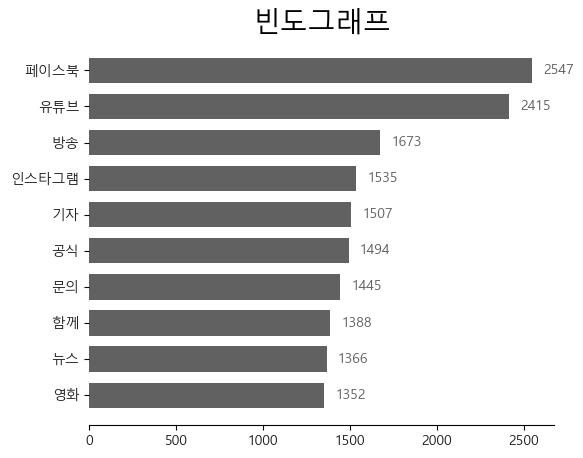

In [258]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(6,5))
fcolor = '#212121'
gcolor = '#616161'


ax = plt.subplot()
hbars = ax.barh(most_n, most_v, height=0.7, color=gcolor)
ax.set_title('빈도그래프', fontsize=20)
ax.invert_yaxis() # 축 반대 정렬
ax.tick_params(axis='both', labelsize=10, labelcolor=fcolor) # 눈금 라벨설정
# 테두리 삭제
for i in 'top right left'.split(): 
    ax.spines[i].set_visible(False)
    
ax.bar_label(hbars, fmt='%g', padding=8, color=gcolor, fontsize=10) # 그래프에 값 라벨 표현
plt.show()

### 1.2 Draw TF-IDF

In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tvec = TfidfVectorizer(max_df=0.9, min_df=20)
X = tvec.fit_transform(store_df['description_tag'])
names = tvec.get_feature_names_out() # 토큰 목록을 배열로 가져옴
x = X.toarray()
xsum = np.sum(x, axis=0) # 2차원 배열의 벡터를 세로(0번축)으로 합침

most_n = []
most_v = []
for ind in np.argsort(xsum)[-10:]: # argsort() 값이 작은 순으로 인덱스가 정렬
    most_n.append(names[ind]) # 토큰과 개수를 순서별로 저장
    most_v.append(xsum[ind])
most_n.reverse()
most_v.reverse()
print(most_n)
print(most_v)

['페이스북', '유튜브', '영화', '문의', '아프리카', '드리', '방송', '감사', '인스타그램', '누르']
[276.2771337160423, 269.7222925280179, 258.09563954507496, 218.6218514953104, 213.03184797546805, 209.56747004393517, 207.14163603549179, 206.97957332840238, 197.64778086782087, 193.10952695433372]


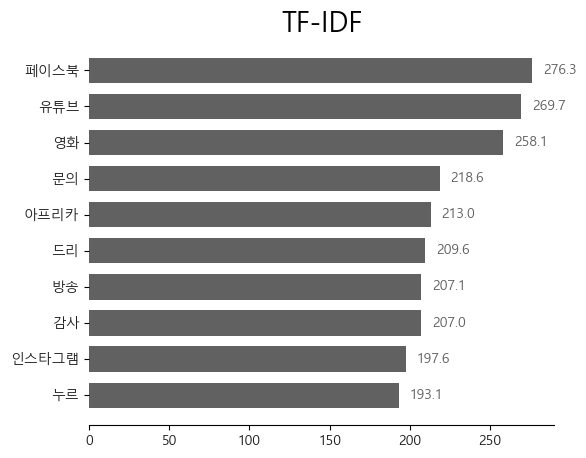

In [260]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(6,5))
fcolor = '#212121'
gcolor = '#616161'


ax = plt.subplot()
hbars = ax.barh(most_n, most_v, height=0.7, color=gcolor)
ax.set_title('TF-IDF', fontsize=20)
ax.invert_yaxis() # 축 반대 정렬
ax.tick_params(axis='both', labelsize=10, labelcolor=fcolor) # 눈금 라벨설정
# 테두리 삭제
for i in 'top right left'.split(): 
    ax.spines[i].set_visible(False)

ax.bar_label(hbars, fmt='%.1f', padding=8, color=gcolor, fontsize=10) # 그래프에 값 라벨 표현
plt.show()

## 2. Word Cloud

### 2.1 Draw Word Cloud
Click [here](https://github.com/amueller/word_cloud) to see more



In [261]:
from wordcloud import WordCloud
import numpy as np

# WordCloud 모델 생성


wc = WordCloud(font_path='./gulim.ttc',  # 폰트입력
               background_color="white", # 배경색
               collocations=False, 
               width=800,                # 넓이
               height=800,               # 높이
               scale=1)                  # 스케일


wc.generate(' '.join(store_df['description_tag'].to_numpy())) # 모델에 텍스트 뭉치 입력


#### print out word cloud image

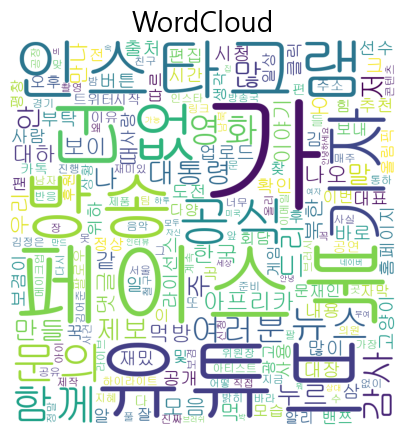

In [262]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

ax = plt.subplot()
ax.imshow(wc) # 이미지를 표에 입력
ax.set_title('WordCloud', fontsize=20)


for i in 'top bottom right left'.split():
    ax.spines[i].set_visible(False)

ax.tick_params(left=False, right=False, labelleft=False,
               labelbottom=False, bottom=False)
plt.show()

#### Change the appearance by setting the mask

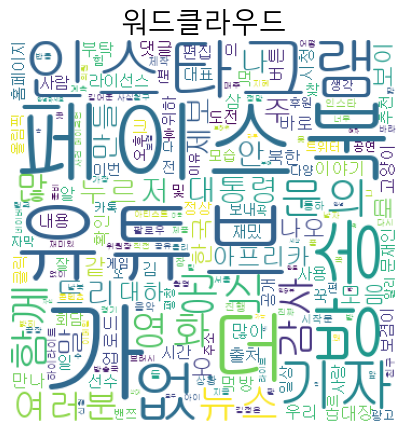

In [263]:
from PIL import Image

mask = np.array(Image.open("./img/white_star.png"))  
wc = WordCloud(mask = mask,              # 마스크 입력
               font_path='./gulim.ttc', background_color="white", 
               collocations=False, width=800, height=800, scale=1)                

wc.generate(' '.join(store_df['description_tag'].to_numpy())) # 모델에 텍스트 뭉치 입력

plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.imshow(wc) # 이미지를 표에 입력
ax.set_title('워드클라우드', fontsize=20)

for i in 'top bottom right left'.split():
    ax.spines[i].set_visible(False)
    
ax.tick_params(left=False, right=False, labelleft=False,
               labelbottom=False, bottom=False)
plt.show()

In [264]:
store_df

,channel_title,publish_time,views,likes,dislikes,comment_count,tags,description,description_sub,description_tag
0,라푸마코리아,2017/11/13 07:07:36,156130,1422,40,272,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,윤종신 좋니의 답가 좋아 최초 공개\n그 여자의 이야기를 지금 만나보세요 \n\n좋...,윤종신 좋니 답가 최초 공개 여자 이야기 지금 만나 딱 잊 추억 정도 딱 알맞 너 ...
1,나몰라패밀리 핫쇼,2017/11/11 07:16:08,421409,5112,166,459,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",퍼가실때 꼭 출처 부탁드려요,퍼가실때 출처 부탁드려요,푸 가 때 꼭 출처 부탁드리
2,미디어몽구,2017/11/12 11:19:52,222850,2093,173,1219,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",다스는 누구겁니까 듣고 난 후 표정,다스는 누구겁니까 듣고 표정,다스 누구 후 표정
3,하우스,2017/11/12 10:17:48,188707,545,311,357,"김정숙|""김정숙 여사""|""김정숙 문재인""|""문재인 대통령""|""문재인""|""문재인 인도...",김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 ...,김정숙 여사는 갑자기 문재인 대통령 주머니에 손을 넣었나 인도네시아 대통령도 깜놀\...,김정숙 여사 왜 갑자기 문재인 대통령 주머니 손 넣 인도네시아 대통령 깜놀 은 라이...
4,채린이의 즐거운 유튜브,2017/11/12 03:30:47,114858,252,40,36,"Positive|""Energy""|""Chakra""|""Balancing""|""Healin...",매일 2개 영상 업로드 됩니다 ^^\n즐겁게 보셨다면 구독과 좋아요를 눌러주세요 ^^,매일 영상 업로드 됩니다 \n즐겁게 보셨다면 구독과 좋아요를 눌러주세요,매일 업로드 누르
...,...,...,...,...,...,...,...,...,...,...
16527,Jaeguchi,2018/06/10 16:32:19,2251851,159331,648,13263,"BTS|""BTS DDAENG""|""DDAENG""|""BTS DDAENG COLOR CO...",All Rights Administered by Bighit Entertainmen...,All Rights Administered by Bighit Entertainmen...,가사 얼음 땡 땡 끗 화투 탱 땡 개얼탱 방탄소년단 땡 땡 방탄 소년 땡 가사 땡 가사
16528,Yuka Kinoshita木下ゆうか,2018/06/12 09:00:11,736406,12361,1527,1637,"foodchallenge|""SocialEating""|""Social Eating""|""...",電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttps://amzn.to/2kI...,電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttpsamzntokIYCTpyo...,라면 막 김치
16529,Kakao Coffee,2018/06/11 07:00:03,159204,433,58,183,"반전|""역관광""|""김치녀""",울산의 한 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다.,울산의 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다,울산 회사원 겪 다이나믹 소개팅 소개
16530,이슈트래커,2018/06/10 23:00:01,156439,383,58,308,[none],- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...,남편을 돈줄로만 아내 좋아요와 구독은 언제나 환영입니다 카톡시리즈 모든 인물과 장소...,남편 도 아내 언제나 환영 카톡 시리즈 인물 장소 구성 위하 허구 사연 구성 작품 ...


## 3. Network Graphs

- **Degree Centrality**

  
- **Page Rank** : 

- Betweenness Centrality

- Closeness Centrality
 
- Eigenvector Centrality

### 3.1 Draw network Graphs

[networkx](https://networkx.org/documentation/stable/tutorial.html)

In [265]:
# 중심단어가 포함된 텍스트만 선별
center = '감사'
isin_df = store_df[store_df['description_tag'].apply(lambda x: center in x)]
isin_df

,channel_title,publish_time,views,likes,dislikes,comment_count,tags,description,description_sub,description_tag
13,꾹TV(Kkuk TV),2017/11/13 10:33:19,182505,6309,165,1737,"방청소|""사고""|""사고영상""|""대박""|""헐""|""청소""|""일상""|""꾹오리""|""드러워""...",꾹TV일상채널 구독하기 http://goo.gl/CFF7ro?sub_confirma...,꾹TV일상채널 구독하기 httpgooglCFFrosub_confirmation \n...,꾹 일상 재미 입담 인스타그램 촬영 방 엉망 방 청소 확인 터닝메카드 골드 버전 만...
14,Ari 는 고양이 내가 주인,2017/11/12 13:39:18,204914,9568,55,2061,"아리|""고양이""|""감사""|""기부""|""아리집사""|""집사""|""피비린내""",동영상 내용과는 별개로 너무 감사합니다.\n능력과 노력에 비해 너무 과분한 관심과 ...,동영상 내용과는 별개로 너무 감사합니다\n능력과 노력에 비해 너무 과분한 관심과 사...,동영상 내용 별개 너무 감사 능력 노력 비하 너무 관심 사랑 주 생각 당장 나 일 ...
22,김초운,2017/11/11 14:28:29,217077,2909,320,534,[none],많은 분들이 볼수있게 좋아요 구독 부탁합니다. APEC 정상중 가장 바쁜 시간 보내...,많은 분들이 볼수있게 좋아요 구독 부탁합니다 APEC 정상중 가장 바쁜 시간 보내는...,많 부탁 정상 가장 바쁘 시간 보내 우리 대통령 내외분 소식 전하 건강 잘 챙기 정...
52,소개해주는 남자,2017/11/10 12:00:01,535876,2485,315,712,"소개해주는 남자|""모범시민""|""영화 모범시민""|""모범시민 해석""|""모범시민 줄거리""...",영화 [모범시민] 전체적인 줄거리 요약 및 리뷰 영상입니다.\n스포일러가 포함되어있...,영화 모범시민 전체적인 줄거리 요약 리뷰 영상입니다\n스포일러가 포함되어있으니 주의...,영화 모범 시민 전체 줄거리 요약 및 리뷰 스포일러 포함 주의 바라 시청 감사
90,채움TV,2017/11/08 15:30:15,1547860,5649,963,1308,"문재인|""이재명""|""안희정""|""김부겸""|""박원순""|""조국""|""민주당""|""더불어민주당...",구독하기&좋아요!~링크공유는 큰~힘이 됩니다!\n추천영상( 국정감사 열받은 학부모-...,구독하기좋아요링크공유는 큰힘이 됩니다\n추천영상 국정감사 열받은 학부모대박활약\nh...,링크 공유 크 힘 추천 국정 감사 열 학부모 대박 활약 추천 이낙연 총리 만루 홈런...
...,...,...,...,...,...,...,...,...,...,...
16501,K연예HOT,2018/06/12 10:19:25,100580,265,332,318,"이재명|""이재명 김부선""|""이재명 아내""|""이재명 결혼""|""이재명 이혼""|""이재명 ...",[충격] 이재명 배우 김부선 스캔들 새 증거 공개. 김부선 계산했던 낙지집 영수증 ...,충격 이재명 배우 김부선 스캔들 증거 공개 김부선 계산했던 낙지집 영수증 카메라 복...,충격 이재명 배우 김부선 스캔들 증거 공개 김부선 계산 낙지 집 영수증 및 카메라 ...
16503,B Man 삐맨,2018/06/10 01:00:00,657932,7614,382,1420,"어벤져스|""어벤져스2""|""어벤져스3""|""어벤져스4""|""어벤져스 인피니티워""|""인피니...",여러분 안녕하세요 삐맨입니다.오늘은 스페인 블로그인 hero x에서 최초로 공개한 ...,여러분 안녕하세요 삐맨입니다오늘은 스페인 블로그인 hero x에서 최초로 공개한 어...,여러분 안녕 삐 맨 스페인 블로그인 최초 공개 어벤져스 컨셉트 아트 대하 알 컨셉트...
16520,HONG SOUND,2018/06/12 12:10:44,211333,4092,108,667,"ASMR|""ASMR한국어""|""극리얼사운드""|""韓国asmr""|""韓国男asmr""|""音フ...",안녕하세요! 오늘은 송주불냉면 지존단계 리얼사운드 먹방 입니다! 비비고 왕교자도 같...,안녕하세요 오늘은 송주불냉면 지존단계 리얼사운드 먹방 입니다 비비고 왕교자도 같이 ...,안녕 송 주 냉면 지존 단계 리얼 사운드 먹방 비비고 왕교자 같이 먹 투게더 에이스...
16521,PPUJIG뿌직,2018/06/13 03:47:20,224994,9898,330,8620,[none],영상 찍고나서 액괴가 더 좋아졌어요 😂항상 영상 찍고 편집하고나면 더 좋아지는 액괴...,영상 찍고나서 액괴가 좋아졌어요 😂항상 영상 찍고 편집하고나면 좋아지는 액괴😿쫀득함...,찍 액괴 더 항상 찍 편집 더 액괴 쫀득하 덜 더 곤약 곤약 감사 기쁘 하루 보내 ...


In [266]:
# 단어쌍 빈도 구하기
count = {}
for line in isin_df['description_tag']:
    words = list(set(line.split()))
    for i, a in enumerate(words):
        for b in words[i + 1:]:   ## 앞뒤 단어를 사전으로 묶어 카운트 (앞뒤가 달라도 동일하게)
            if a > b:
                count[b, a] = count.get((b, a), 0) + 1
            else:
                count[a, b] = count.get((a, b), 0) + 1

net_list = [(w[0], w[1], count[w]) for w in count]
net_df = pd.DataFrame(net_list, columns=['w1', 'w2', 'f']) # 데이터프레임으로 변환
net_df = net_df.sort_values(by=['f'], ascending=False) # 빈도수로 정렬
net_df = net_df[net_df['f'] > 10] # 너무 적은 빈도는 제외
net_df

,w1,w2,f
3961,감사,드리,306
3237,감사,시청,257
146,감사,인스타그램,242
3963,감사,여러분,226
560,감사,보이,198
...,...,...,...
178568,좋아하,통닭,11
178781,만나,일상,11
50976,누구,저,11
178783,일상,저번,11


In [267]:
import networkx as nx

G_cen = nx.Graph()

## 1차 그래프 그리기
    # 두단어를 두개의 노드로 그리기
    # 두단어를 엣지로 연결하고 엣지에 가중치 할당
for net in net_df.iloc:
    G_cen.add_edge(net['w1'], net['w2'], weight=int(net['f'])) 

# 1차 그래프를 활용해 중심성 알고리즘으로 노드의 크기 연산 
centrality = nx.degree_centrality(G_cen) # 연결중심성
# centrality = nx.pagerank(G_cen) # 페이지링크
centrality


{'감사': 0.9987995198079231,
 '드리': 0.3061224489795918,
 '시청': 0.2701080432172869,
 '인스타그램': 0.22088835534213683,
 '여러분': 0.23169267707082833,
 '보이': 0.22929171668667464,
 '많': 0.24729891956782712,
 '만들': 0.2280912364945978,
 '방송': 0.20888355342136852,
 '더': 0.23769507803121248,
 '저': 0.3769507803121248,
 '모습': 0.1524609843937575,
 '박스': 0.13925570228091236,
 '일상': 0.16206482593037214,
 '가': 0.25930372148859543,
 '재미': 0.15486194477791115,
 '반응': 0.14165666266506602,
 '부탁': 0.11284513805522207,
 '확인': 0.16566626650660263,
 '먹방': 0.16566626650660263,
 '주': 0.19447779111644656,
 '페이스북': 0.21368547418967584,
 '없': 0.1956782713085234,
 '맞': 0.12364945978391356,
 '재밌': 0.11644657863145258,
 '꾹': 0.10444177671068426,
 '제품': 0.10564225690276109,
 '상황': 0.10804321728691475,
 '편': 0.12004801920768307,
 '도전': 0.10924369747899158,
 '발전': 0.1020408163265306,
 '누르': 0.10924369747899158,
 '슈트': 0.11284513805522207,
 '아이언맨': 0.10324129651860743,
 '장난감': 0.09363745498199279,
 '까': 0.09483793517406962,
 

In [268]:
## 2차 그래프 그리기
G = nx.Graph()
nsize = 2000
w_size = 30

# 중심성 알고리즘을 통해 연산한 단어의 중심값을 노드의 크기로 설정
node_size = []
for node in list(centrality)[:w_size]:
    G.add_node(node)
    node_size.append(centrality[node] * nsize)
    
# 엣지 가중치는 빈도수로 동일하게 설정
for net in net_df.iloc:
    if net['w1'] in G.nodes and net['w2'] in G.nodes:
        G.add_weighted_edges_from([(net['w1'], net['w2'], int(net['f']))])
        


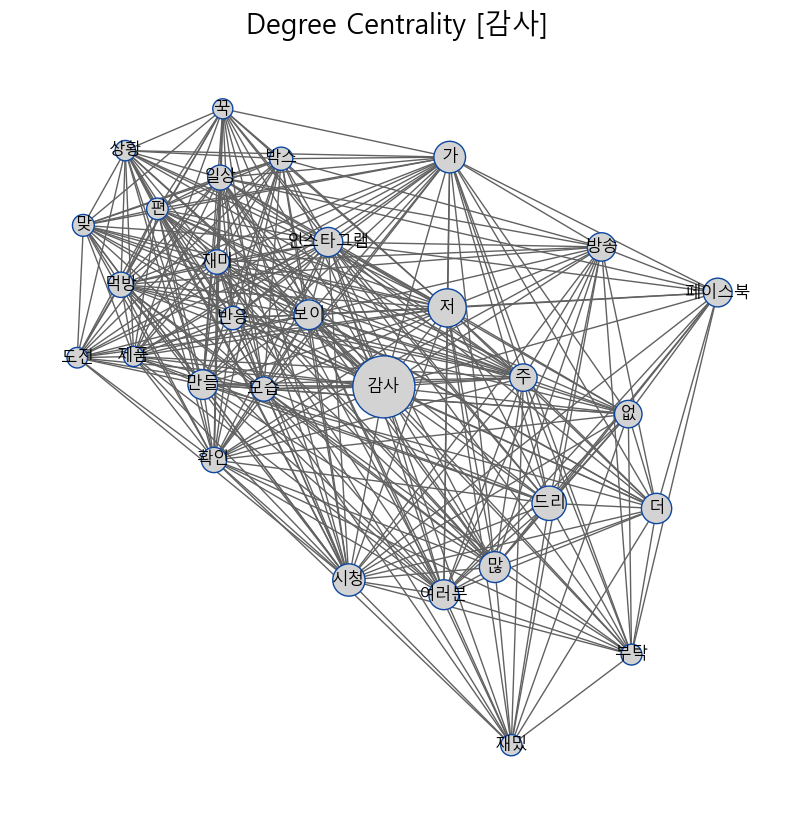

In [269]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,10))
fcolor = '#212121'
gcolor = '#616161'
k = 1
ax = plt.subplot()
pos = nx.spring_layout(G, k=k)
nx.draw_networkx(G, pos,
                 ax = ax,
                 node_size=node_size,
                 with_labels=True,
                 edge_color=gcolor,
                 edgecolors='#0d47a1',
                 node_color='lightgray',
                 font_weight='regular',
                 font_family= 'Malgun Gothic')

for i in 'top bottom right left'.split():
    ax.spines[i].set_visible(False)

ax.tick_params(left=False, right=False, labelleft=False,
               labelbottom=False, bottom=False)
ax.set_title('Degree Centrality [감사]', fontsize=20)
plt.show()

## 4. LDA 토픽 모델링

In [270]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


cvec = CountVectorizer(max_df=0.9, min_df=2 )
tf = cvec.fit_transform(store_df['description_tag']) # 벡터화

model = LatentDirichletAllocation(n_components=4, # 토픽개수
                                  max_iter=10, # 반복 횟수
                                  learning_method = 'online', # 미니배치
                                  random_state=0,  # 난수 설정
                                 )

model.fit(tf)

LatentDirichletAllocation(learning_method='online', n_components=4,
                          random_state=0)

In [271]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()


# lda 모델, 벡터, 벡터모델을 인자로 하여 시각화 자료 생성
pl = pyLDAvis.lda_model.prepare(model, tf, cvec)

# 반응형 html로 저장
pyLDAvis.save_html(pl, './model/lda_cvec.html')
# 노트북에 출력
pyLDAvis.display(pl)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df_v = pd.read_csv('data/KRvideos.csv', encoding_errors = 'ignore') #불러올때 CP949든 utf-8이든 둘 다 안 될 경우

df_v = df_v[(df_v['comments_disabled'] == False) & (df_v['comments_disabled'] == False) & (df_v['comments_disabled'] == False)]
# df_v = df_v.set_index('channel_title')
df_v = df_v[['channel_title', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count', 'tags',  'description']]
# df_v = df_v.sort_values('views', ascending = False)
df_v['publish_time'] = pd.to_datetime(df_v['publish_time'], format='ISO8601')
df_v['publish_time'] = df_v['publish_time'].dt.strftime('%Y/%m/%d %H:%M:%S')
df_v = df_v[df_v['views'] >= 100000]
df_v = df_v.dropna()
df_v = df_v.reset_index()
df_v = df_v.drop('index', axis=1)
df_v


In [3]:
clear()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df_v = pd.read_csv('data/KRvideos.csv', encoding_errors = 'ignore') #불러올때 CP949든 utf-8이든 둘 다 안 될 경우
df_v = df_v.dropna()
df_v = df_v[(df_v['comments_disabled'] == False) & (df_v['comments_disabled'] == False) & (df_v['comments_disabled'] == False)]
df_v = df_v[['channel_title', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count']]
# df_v = df_v.set_index('channel_title')
df_v['publish_time'] = pd.to_datetime(df_v['publish_time'], format='ISO8601')
df_v['publish_time'] = df_v['publish_time'].dt.strftime('%Y/%m/%d %H:%M:%S')
df_v = df_v.sort_values('likes', ascending = False)
df_v = df_v[df_v['views'] > 100000]# 얘를 넣으면 밑에서 그래프가 그려지고 안 그려지고가 결정됨
df_v = df_v[df_v['comment_count'] > 3]
df_v
# df_v = df_v['publish_time'] = pd.to_datetime(df_v['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
# df_v['publish_time'] = pd.to_datetime(df_v['publish_time'], format='%Y-%m-%dT%H:%M')
# 'publish_time' 칼럼의 datetime 형식을 이런 표현 말고 다른게 딱 년월일,시분까지만 나오도록 하고 싶은데 어떻게 하지
# df_v[df_v['comment_count'] ==0].count() # 이렇게 하면 13개 나옴

,channel_title,publish_time,views,likes,dislikes,comment_count
30844,ibighit,2018/05/18 09:00:02,87430865,5150839,172570,1142274
30583,ibighit,2018/05/18 09:00:02,80738011,5053338,165854,1114800
30352,ibighit,2018/05/18 09:00:02,73463137,4924056,156026,1084435
30486,ibighit,2018/05/18 09:00:02,73463137,4924056,156026,1084435
30171,ibighit,2018/05/18 09:00:02,65396157,4750254,141966,1040912
...,...,...,...,...,...,...
30558,프란,2018/05/22 10:32:44,126060,0,0,225
4956,모비딕 Mobidic,2017/12/07 09:30:03,960354,0,0,1287
31803,[Dorothy]도로시,2018/05/29 01:41:18,292083,0,0,509
10314,박수,2018/01/14 02:38:02,181044,0,0,193


In [5]:
df_v[df_v['channel_title'] == 'ibighit'].count()   # 이게 뭔가 했더니 방탄소년단 offical 영상 나오는 채널의 예전 이름인가봐

channel_title    33
publish_time     33
views            33
likes            33
dislikes         33
comment_count    33
dtype: int64

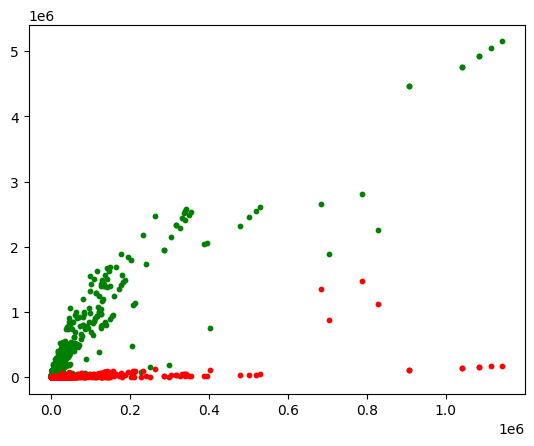

In [7]:

plt.scatter(x= df_v['comment_count'], y= df_v['likes'], s=10 , color = 'green')
plt.scatter(x= df_v['comment_count'], y= df_v['dislikes'], s=10 , color = 'red')
plt.show()

조회수와 좋아요 싫어요 관계

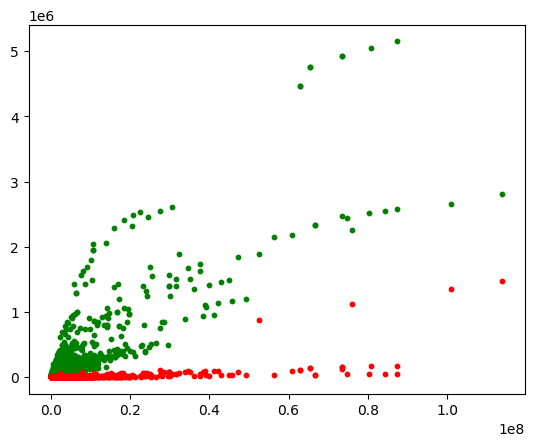

In [79]:

plt.scatter(x= df_v['views'], y= df_v['likes'], s=10 , color = 'green')
plt.scatter(x= df_v['views'], y= df_v['dislikes'], s=10 , color = 'red')
plt.show()

댓글수랑 좋아요 싫어요 관계

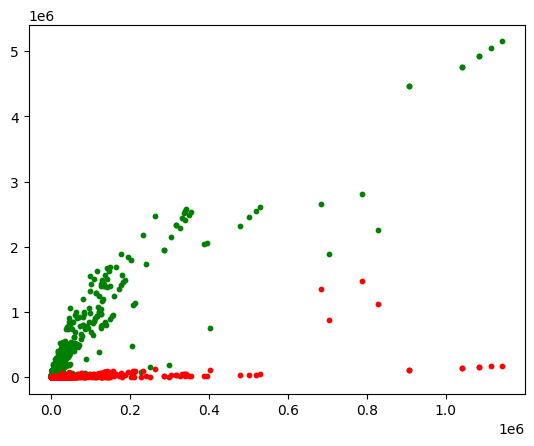

In [80]:

plt.scatter(x= df_v['comment_count'], y= df_v['likes'], s=10 , color = 'green')
plt.scatter(x= df_v['comment_count'], y= df_v['dislikes'], s=10 , color = 'red')
plt.show()

이거 이상치 +- 3% 정도 제거하고 직선 그으면 좋겠네

좋아요가 늘어나면 댓글 수가 거진 1:1 혹은 그보다 조금 못나는 정도로 늘어나는데,
싫어요가 늘어나면 댓글 수가 가파르게 많다

# 모델 불러오기



In [81]:
from sklearn import linear_model


regO = linear_model.LinearRegression()

In [82]:
regO = linear_model.LinearRegression()

In [83]:
train_X = np.reshape(df_v['dislikes'].to_numpy(), (-1,1))
train_O = np.reshape(df_v['likes'].to_numpy(), (-1,1))
yO = df_v['likes'].to_numpy()
yX = df_v['dislikes'].to_numpy()
train_X.shape

(16937, 1)

In [84]:
train_O.shape

(16937, 1)

In [85]:
regX.fit(train_X, df_v['dislikes'])
# train_X & train_O,  이렇게는 뇌피셜로 그냥 해본건데 가능한건가

LinearRegression()

In [86]:
regO.fit(train_O, df_v['likes'])

LinearRegression()

In [87]:
df_v['Xment'] = regX.predict(train_X )

In [88]:
df_v['Oment'] = regO.predict(train_X )

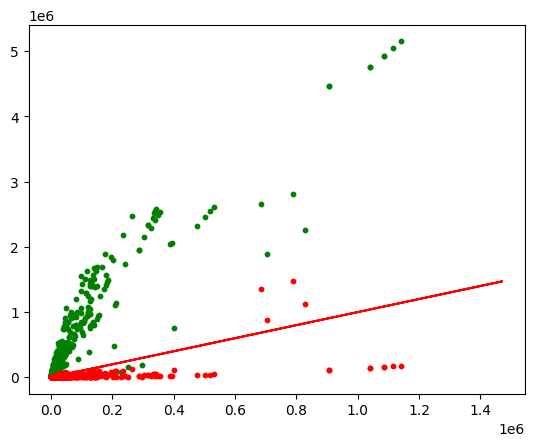

In [90]:
plt.scatter(x= df_v['comment_count'], y= df_v['likes'], s=10 , color = 'green')
plt.scatter(x= df_v['comment_count'], y= df_v['dislikes'], s=10 , color = 'red')
plt.plot(train_X, df_v['Xment'], color='red') 
# plt.plot(train_O, df_v['Oment'], color='green') 
# plt.plot(df_v['likes'], disXment, color='green')
plt.show()

In [ ]:
# plt.scatter(x=df_v['likes'], y=df_v['comment_count'], s=10)
# plt.plot(df_v['likes'], df_v['disXment'], color='red')
# plt.show()

그냥 대박이네 ㅋㅋㅋ

In [91]:
df_v.describe()

# 음 이거 기준을 못 바꾸나, 위에도 보면 언제부턴가 알아서 le6가 붙어있는데

,views,likes,dislikes,comment_count,Xment,Oment
count,1.693700e+04,1.693700e+04,1.693700e+04,1.693700e+04,1.693700e+04,1.693700e+04
mean,7.831865e+05,2.343963e+04,1.030813e+03,3.843075e+03,1.030813e+03,1.030813e+03
std,3.413394e+06,1.664422e+05,1.957042e+04,3.061122e+04,1.957042e+04,1.957042e+04
min,1.000120e+05,0.000000e+00,0.000000e+00,4.000000e+00,-8.640200e-12,2.255547e-10
25%,1.592040e+05,1.112000e+03,6.800000e+01,3.740000e+02,6.800000e+01,6.800000e+01
50%,2.648100e+05,2.894000e+03,1.470000e+02,8.110000e+02,1.470000e+02,1.470000e+02
75%,5.389900e+05,6.906000e+03,3.420000e+02,1.803000e+03,3.420000e+02,3.420000e+02
max,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06,1.470388e+06,1.470388e+06


In [92]:
clear()

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df_v = pd.read_csv('data/KRvideos.csv', encoding_errors = 'ignore') #불러올때 CP949든 utf-8이든 둘 다 안 될 경우

df_v = df_v[(df_v['comments_disabled'] == False) & (df_v['comments_disabled'] == False) & (df_v['comments_disabled'] == False)]
# df_v = df_v.set_index('channel_title')
df_v = df_v[['channel_title', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count', 'tags',  'description']]
# df_v = df_v.sort_values('views', ascending = False)
df_v['publish_time'] = pd.to_datetime(df_v['publish_time'], format='ISO8601')
df_v['publish_time'] = df_v['publish_time'].dt.strftime('%Y/%m/%d %H:%M:%S')
df_v = df_v[df_v['views'] >= 100000]
df_v = df_v.dropna()
df_v = df_v.reset_index()
df_v = df_v.drop('index', axis=1)
df_v


,channel_title,publish_time,views,likes,dislikes,comment_count,tags,description
0,라푸마코리아,2017/11/13 07:07:36,156130,1422,40,272,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,나몰라패밀리 핫쇼,2017/11/11 07:16:08,421409,5112,166,459,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",퍼가실때 꼭 출처 부탁드려요
2,미디어몽구,2017/11/12 11:19:52,222850,2093,173,1219,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",다스는 누구겁니까 듣고 난 후 표정
3,하우스,2017/11/12 10:17:48,188707,545,311,357,"김정숙|""김정숙 여사""|""김정숙 문재인""|""문재인 대통령""|""문재인""|""문재인 인도...",김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 ...
4,채린이의 즐거운 유튜브,2017/11/12 03:30:47,114858,252,40,36,"Positive|""Energy""|""Chakra""|""Balancing""|""Healin...",매일 2개 영상 업로드 됩니다 ^^\n즐겁게 보셨다면 구독과 좋아요를 눌러주세요 ^^
...,...,...,...,...,...,...,...,...
16950,[Dorothy]도로시,2018/06/11 07:45:37,285007,0,0,566,"먹방|""MUKBANG""|""점심""|""아침""|""저녁""|""eating""|""show""|""k...",instagram - mgain83
16951,Yuka Kinoshita木下ゆうか,2018/06/12 09:00:11,736406,12361,1527,1637,"foodchallenge|""SocialEating""|""Social Eating""|""...",電動ペッパーミル 傾けるだけで挽けるコショウ・岩塩ミルhttps://amzn.to/2kI...
16952,Kakao Coffee,2018/06/11 07:00:03,159204,433,58,183,"반전|""역관광""|""김치녀""",울산의 한 회사원분이 겪으신 다이나믹한 소개팅을 소개해 드립니다.
16953,이슈트래커,2018/06/10 23:00:01,156439,383,58,308,[none],- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...


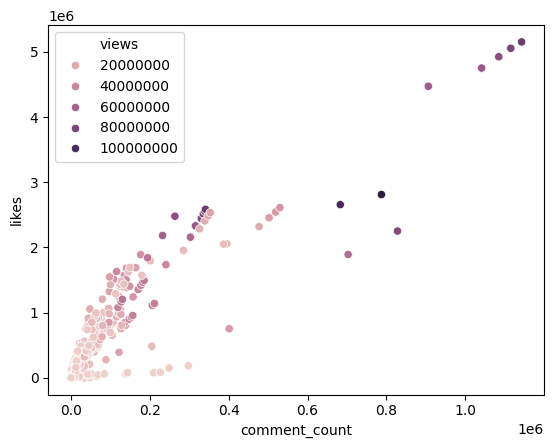

In [96]:
sns.scatterplot(data=df_v, x= 'comment_count',y='likes',hue='views')
plt.show()